# Normal Equation
The Normal Equation is a closed-form solution to find the optimal parameters (weights) of a linear regression model. It provides a direct method to calculate the parameters that minimize the cost function without using an iterative algorithm like gradient descent.

The Normal Equation can be expressed mathematically as:

θ = (X^T X)^-1 X^T y

Where:
 - θ is the vector of parameters (weights) to be optimized
 - X is the matrix of input features (including a column of ones for the intercept term)
 - y is the vector of target values (output)
 - X^T is the transpose of X
 - (X^T X)^-1 is the inverse of the matrix product X^T X

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    
    def fit_normal_equation(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # add intercept term
        theta = np.linalg.inv(X.T @ X) @ X.T @ y
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]
    
    def fit_gradient_descent(self, X, y, learning_rate=0.01, max_iter=1000):
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # add intercept term
        theta = np.zeros(X.shape[1])
        for i in range(max_iter):
            gradient = X.T @ (X @ theta - y)
            theta -= learning_rate * gradient
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]


In [4]:
# generate random data
np.random.seed(0)
X = np.random.randn(100, 1)
y = 2 * X[:, 0] + 1 + np.random.randn(100)

In [5]:
# fit using Normal Equation
lr = LinearRegression()
lr.fit_normal_equation(X, y)
print("Normal Equation:")
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

Normal Equation:
Intercept: 1.0751530850525146
Coefficients: [2.11469843]


In [6]:
# fit using Gradient Descent
lr = LinearRegression()
lr.fit_gradient_descent(X, y)
print("Gradient Descent:")
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

Gradient Descent:
Intercept: 1.0751530850525142
Coefficients: [2.11469843]


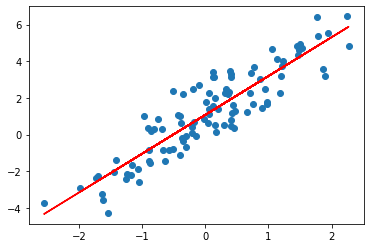

In [7]:
# plot data and linear regression line
plt.scatter(X, y)
plt.plot(X, lr.intercept_ + lr.coef_ * X, color='red')
plt.show()